# Lecture 10 - Spring 2024

Data Science, Spring 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 1st Task

We will first define some helper functions to calculate the regression line for us. Apply these helper funtions on house price dataset and compare with your previous model (you built using sklearn built-in funtions).

Custom Model: Intercept = 1079.6183184356196, Slope = 49.762908427644014, MSE = 103994078.37058249
Sklearn Model: Intercept = 1079.6183184356487, Slope = 49.76290842764401, MSE = 103994078.37058245


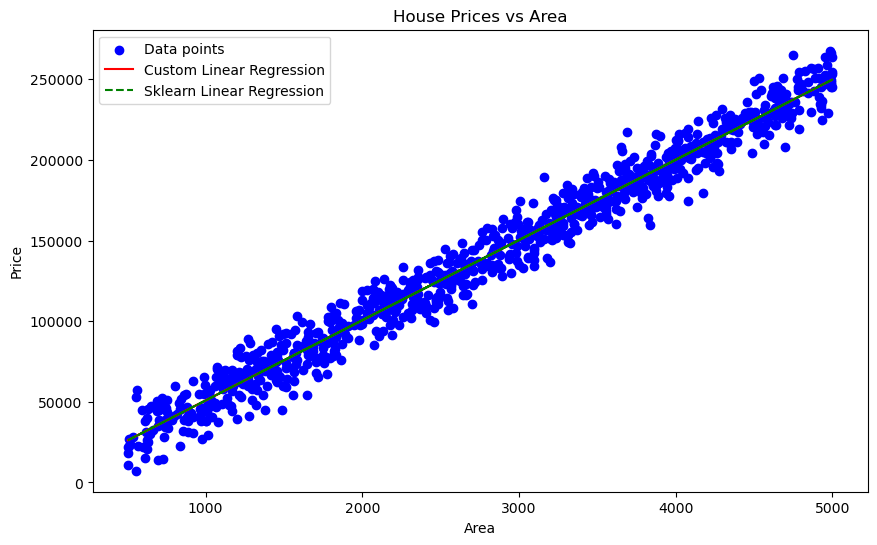

In [ ]:
# Helper functions
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    r = correlation(x, y)
    return r * (np.std(y) / np.std(x))

def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

def fit_least_squares(x, y):
    theta_1 = slope(x, y)
    theta_0 = intercept(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def compute_mse(y, yhat):
    return np.mean((y - yhat) ** 2)

# Load the dataset
data = pd.read_csv('SLR_house_prices.csv')
df = pd.DataFrame(data)

# Remove rows with NaN values (alternatively, use df.fillna(df.mean(), inplace=True))
df.dropna(inplace=True)

x = df['area']
y = df['price']

# Fit the model using custom functions
theta_0, theta_1 = fit_least_squares(x, y)
yhat_custom = predict(x, theta_0, theta_1)
mse_custom = compute_mse(y, yhat_custom)

# Fit the model using sklearn
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
yhat_sklearn = model.predict(x.values.reshape(-1, 1))
mse_sklearn = mean_squared_error(y, yhat_sklearn)

# Print results
print(f'Custom Model: Intercept = {theta_0}, Slope = {theta_1}, MSE = {mse_custom}')
print(f'Sklearn Model: Intercept = {model.intercept_}, Slope = {model.coef_[0]}, MSE = {mse_sklearn}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, yhat_custom, color='red', label='Custom Linear Regression')
plt.plot(x, yhat_sklearn, color='green', linestyle='dashed', label='Sklearn Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Prices vs Area')
plt.legend()
plt.show()


# 2nd Task
Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [ ]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# create dataframes
datasets = {
    "Dataset I": (x, y1),
    "Dataset II": (x, y2),
    "Dataset III": (x, y3),
    "Dataset IV": (x4, y4)
}
# apply SLR model on these four Datasets
results = {}

for name, (x, y) in datasets.items():
    x = np.array(x)
    y = np.array(y)

    # Custom SLR
    theta_0, theta_1 = fit_least_squares(x, y)
    yhat_custom = predict(x, theta_0, theta_1)
    mse_custom = compute_mse(y, yhat_custom)

    # Sklearn SLR
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    yhat_sklearn = model.predict(x.reshape(-1, 1))
    mse_sklearn = mean_squared_error(y, yhat_sklearn)

    results[name] = {
        "Custom Model": {"Intercept": theta_0, "Slope": theta_1, "MSE": mse_custom},
        "Sklearn Model": {"Intercept": model.intercept_, "Slope": model.coef_[0], "MSE": mse_sklearn}
    }


In [ ]:
for name, result in results.items():
    print(f"{name}: theta_0 {result['Custom Model']['Intercept']}, theta_1 {result['Custom Model']['Slope']}")


Dataset I: theta_0 3.000090909090911, theta_1 0.500090909090909
Dataset II: theta_0 3.000909090909091, theta_1 0.4999999999999999
Dataset III: theta_0 3.0024545454545457, theta_1 0.4997272727272727
Dataset IV: theta_0 3.0017272727272752, theta_1 0.49990909090909064


Looks like all four datasets have exactly the same fit.

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [ ]:
def compute_rmse(y, yhat):
    return np.sqrt(compute_mse(y, yhat))
for name, (x, y) in datasets.items():
    x = np.array(x)
    y = np.array(y)
    theta_0, theta_1 = fit_least_squares(x, y)
    y_pred = predict(x, theta_0, theta_1)
    rmse = compute_rmse(y, y_pred)


    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_stdev = np.std(x)
    y_stdev = np.std(y)
    r = correlation(x, y)


    print(f">>> Dataset {name}:")
    print(f"x_mean : {x_mean:.2f}, y_mean : {y_mean:.2f}")
    print(f"x_stdev: {x_stdev:.2f}, y_stdev: {y_stdev:.2f}")
    print(f"r = Correlation(x, y): {r:.3f}")
    print(f"theta_0: {theta_0:.2f}, theta_1: {theta_1:.2f}")
    print(f"RMSE: {rmse:.3f}")
    print()

>>> Dataset Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.119

>>> Dataset Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.119

>>> Dataset Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.118

>>> Dataset Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
theta_0: 3.00, theta_1: 0.50
RMSE: 1.118



However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

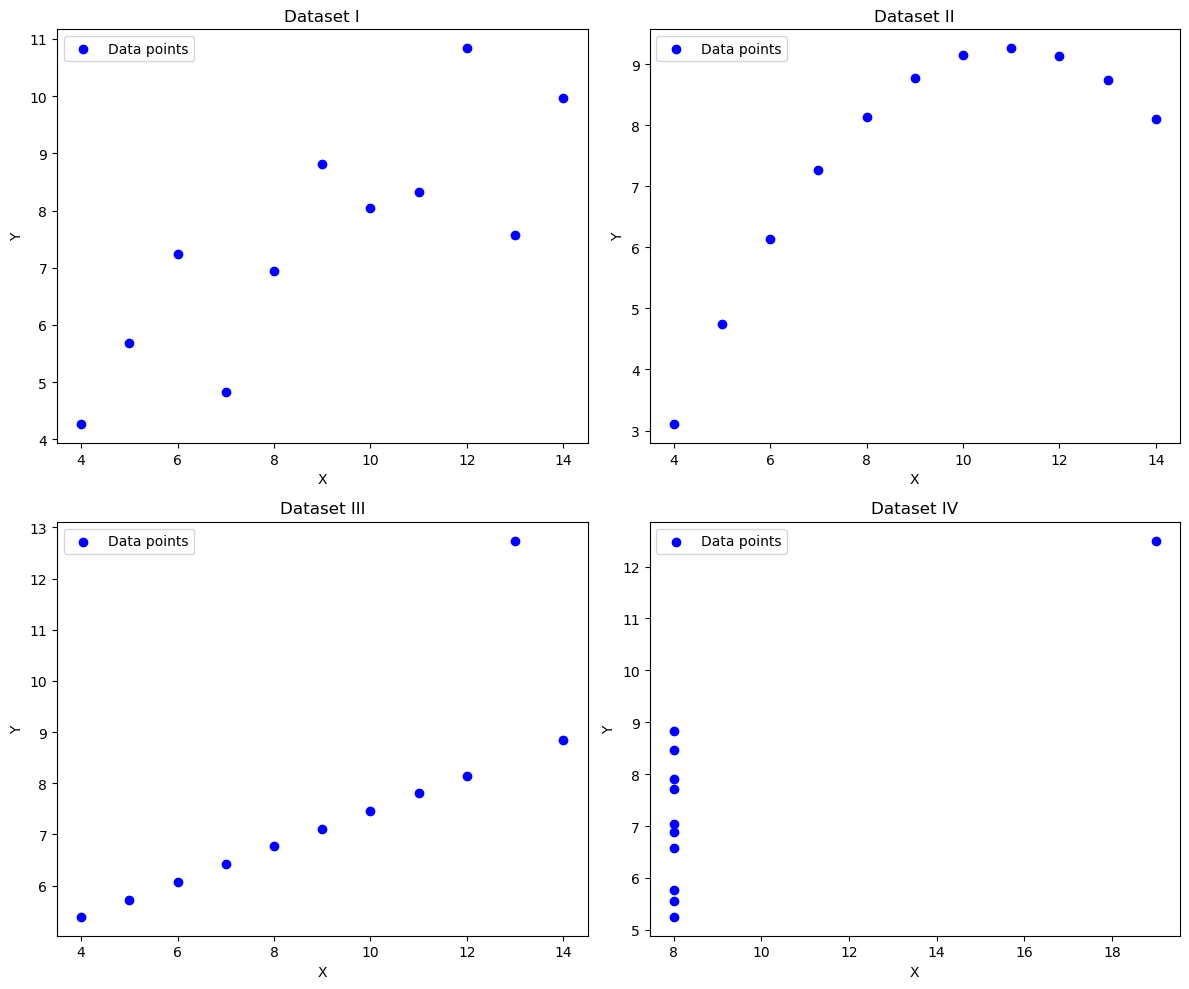

In [ ]:
# visualize all four datasets
plt.figure(figsize=(12, 10))

for i, (name, (x, y)) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    plt.scatter(x, y, color='blue', label='Data points')
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()
plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

If you remember from Data 8, "the residual plot of a good regression shows no pattern".

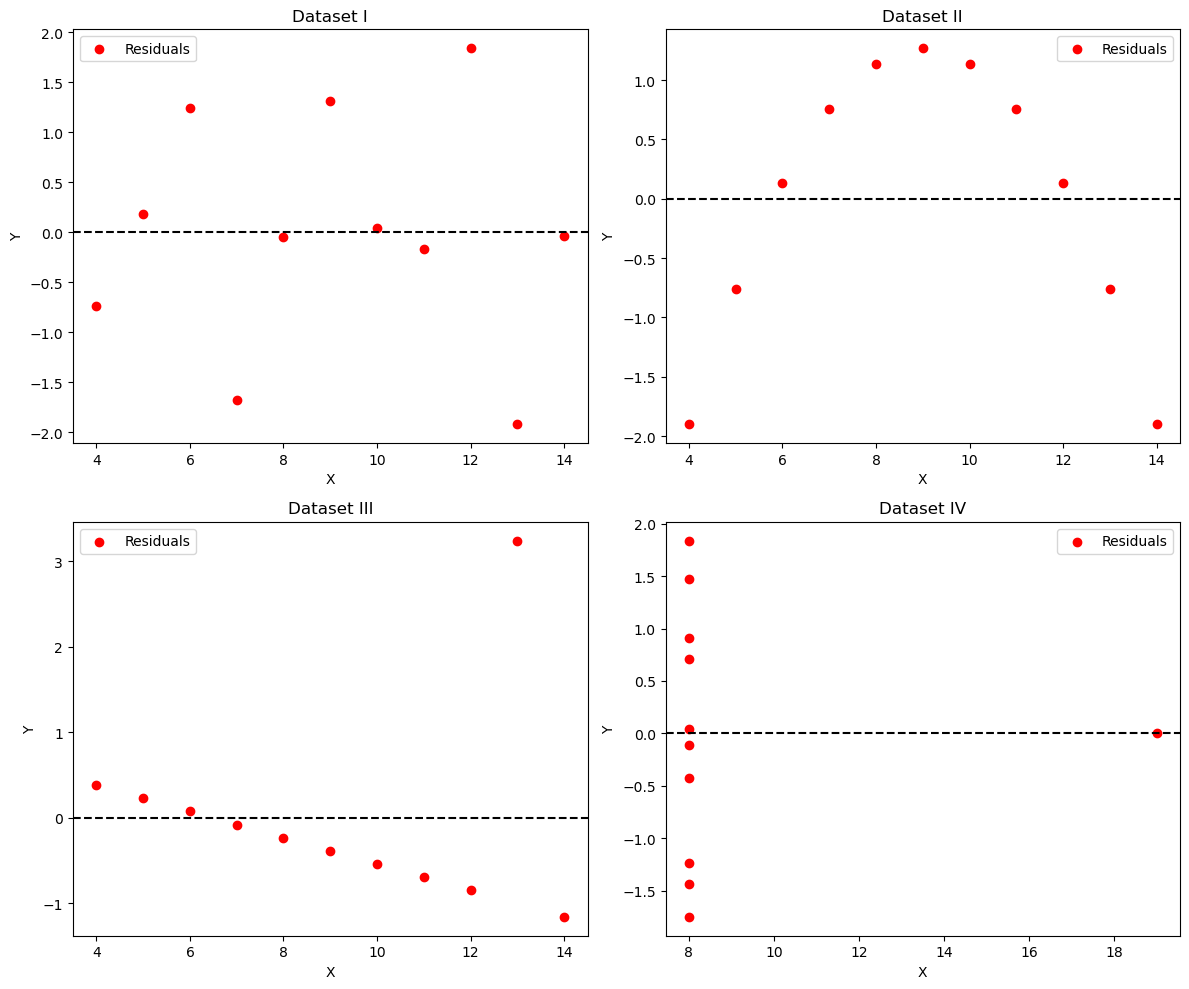

In [ ]:
# plot residual with respect to x for all four Datasets
plt.figure(figsize=(12, 10))

for i, (name, (x, y)) in enumerate(datasets.items(), start=1):
    x = np.array(x)
    y = np.array(y)

    # Fit the model using sklearn
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    yhat_sklearn = model.predict(x.reshape(-1, 1))

    # Compute residuals
    residuals = y - yhat_sklearn

    plt.subplot(2, 2, i)
    plt.scatter(x, residuals, color='red', label='Residuals')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()
plt.show()

The takeaway here is that you should always visualize your datasets before fitting any models to it!